In [1]:
!python --version

Python 3.11.8


In [2]:
import layoutparser as lp
from layoutparser.models.detectron2 import catalog
import cv2 as cv
from matplotlib import pyplot as plt
import copy
import os
import requests

In [3]:
def load_model(config_path: str='lp://<dataset_name>/<model_name>/config', extra_config=None):
    config_path_split = config_path.split('/')
    dataset_name = config_path_split[-3]
    model_name = config_path_split[-2]

    # get the URLs from the MODEL_CATALOG and the CONFIG_CATALOG 
    # (global variables .../layoutparser/models/detectron2/catalog.py)
    model_url = catalog.MODEL_CATALOG[dataset_name][model_name]
    config_url = catalog.CONFIG_CATALOG[dataset_name][model_name]

    # override folder destination:
    if 'model' not in os.listdir():
        os.mkdir('model')

    config_file_path, model_file_path = None, None

    for url in [model_url, config_url]:
        filename = url.split('/')[-1].split('?')[0]
        save_to_path = f"model/" + filename
        if 'config' in filename:
            config_file_path = copy.deepcopy(save_to_path)
        if 'model_final' in filename:
            model_file_path = copy.deepcopy(save_to_path)

        # skip if file exist in path
        if filename in os.listdir("model"):
            continue
        # Download file from URL
        r = requests.get(url, stream=True, headers={'user-agent': 'Wget/1.16 (linux-gnu)'})

        with open(save_to_path, "wb") as f:
            for chunk in r.iter_content(chunk_size=4096):
                if chunk:
                    f.write(chunk)

    # load the label map
    label_map = catalog.LABEL_MAP_CATALOG[dataset_name]

    return lp.models.Detectron2LayoutModel(
        config_path=config_file_path,
        model_path=model_file_path,
        label_map=label_map,
        extra_config=extra_config
    )

In [13]:
def parseLayout(image, model):
    model = load_model(config_path=model, extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.7],)
    layout = model.detect(image)
    output = lp.draw_box(image, layout, box_width=3, show_element_type=True,
                         id_font_size=20, id_text_background_color='yellow')
    return {
        'layout': layout,
        'output': output
    }

In [11]:
image='/home/nikin/Downloads/papers/x.png'
x = cv.imread(image)
x = x[..., ::-1]
model='lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config'
result = parseLayout(x, model)

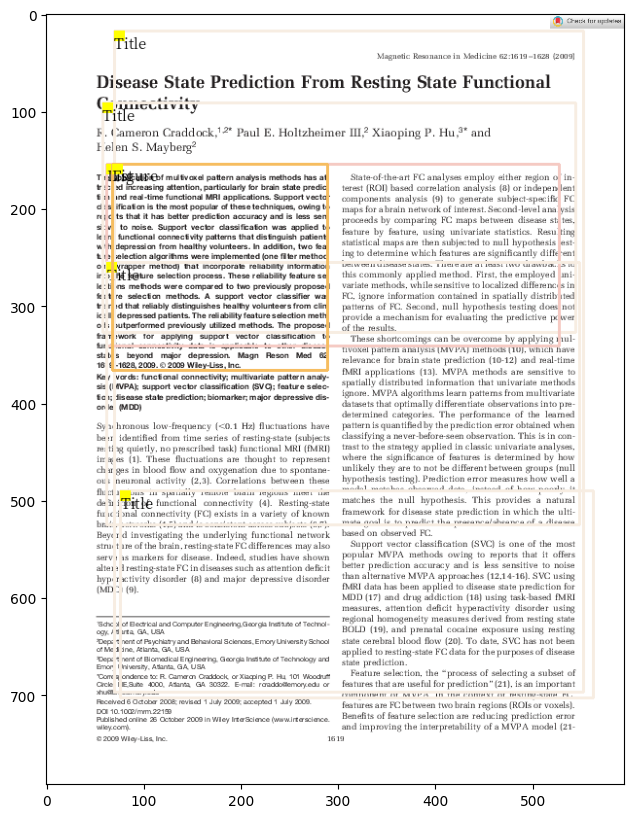

In [12]:
plt.figure(figsize=(15, 10))
plt.imshow(result['output'])

In [7]:
for 

SyntaxError: invalid syntax (1235331270.py, line 1)

## Good Results

1. `lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config`
1. `lp://HJDataset/faster_rcnn_R_50_FPN_3x/config`

## Bad Results

1. `lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config`
1. `lp://HJDataset/mask_rcnn_R_50_FPN_3x/config`